<span style="color:red;">Here we train and tune the neural network <br>
we also compare it with benchmarks</span>

In [2]:
!pip install tensorflow
!pip install keras-tuner

In [27]:
import tensorflow as tf
import pandas as pd
import numpy as np
import keras_tuner
import keras.backend as K

from sklearn.utils import shuffle
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam

import random
import matplotlib.pyplot as plt

In [4]:
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.11.0


<h1>Frequency List</h1>

In [5]:
# read training file, the frequency list
df = pd.read_excel('z_features.xlsx', sheet_name='train_set')
df

,Symbol,Name,average amount of letters,average amount of syllables,abcde,middle,vwxyz,vowel to length ratio,most repetitions,word has error,Englishness score
0,8878596,the,3,1,0,1,0,0.333333,1,0,-5.570192
1,5372682,be,2,1,1,0,0,0.500000,1,0,-6.531633
2,4658360,of,2,1,0,1,0,0.500000,1,0,-5.452435
3,4270734,and,3,1,1,0,0,0.333333,1,0,-6.399709
4,4234482,to,2,1,0,1,0,0.500000,1,0,-5.171922
...,...,...,...,...,...,...,...,...,...,...,...
19025,218,marquis,7,2,0,1,0,0.428571,1,0,-1.581692
19026,218,handicraft,10,3,0,1,0,0.300000,2,0,2.702254
19027,218,bravely,7,3,1,0,0,0.428571,1,0,-3.961951
19028,218,harrisburg,10,3,0,1,0,0.300000,3,1,8.358353


In [6]:
# shuffle it, gland...
df = shuffle(df, random_state=0)
df

,Symbol,Name,average amount of letters,average amount of syllables,abcde,middle,vwxyz,vowel to length ratio,most repetitions,word has error,Englishness score
7655,1048,gland,5,1,0,1,0,0.200000,1,0,-2.473921
18927,219,bees,4,1,1,0,0,0.500000,2,0,-1.669587
8035,970,resurrection,12,4,0,1,0,0.416667,3,0,-0.123908
10231,637,polished,8,3,0,1,0,0.375000,1,0,-2.657337
18237,232,filesystem,10,4,0,1,0,0.400000,2,1,9.402030
...,...,...,...,...,...,...,...,...,...,...,...
9225,762,barton,6,2,1,0,0,0.333333,1,0,-2.951335
13123,415,asynchronous,12,4,1,0,0,0.416667,2,0,2.226014
9845,686,forecasting,11,4,0,1,0,0.363636,1,0,-0.106837
10799,582,muster,6,2,0,1,0,0.333333,1,0,-4.603879


In [7]:
# make the train (80%), validation (10%) and test (10%) set, also the all set (100%)

all = df
train = df.iloc[0:15224]
validation = df.iloc[15224:17127]
test = df.iloc[17127:19030]

<h2> All </h2>

In [8]:
all = all.drop('Name', axis=1)
all

,Symbol,average amount of letters,average amount of syllables,abcde,middle,vwxyz,vowel to length ratio,most repetitions,word has error,Englishness score
7655,1048,5,1,0,1,0,0.200000,1,0,-2.473921
18927,219,4,1,1,0,0,0.500000,2,0,-1.669587
8035,970,12,4,0,1,0,0.416667,3,0,-0.123908
10231,637,8,3,0,1,0,0.375000,1,0,-2.657337
18237,232,10,4,0,1,0,0.400000,2,1,9.402030
...,...,...,...,...,...,...,...,...,...,...
9225,762,6,2,1,0,0,0.333333,1,0,-2.951335
13123,415,12,4,1,0,0,0.416667,2,0,2.226014
9845,686,11,4,0,1,0,0.363636,1,0,-0.106837
10799,582,6,2,0,1,0,0.333333,1,0,-4.603879


In [9]:
# get x and y
all_x = all.loc[:, all.columns != 'Symbol']
all_y = all.loc[:, all.columns == 'Symbol']

In [10]:
all_y

,Symbol
7655,1048
18927,219
8035,970
10231,637
18237,232
...,...
9225,762
13123,415
9845,686
10799,582


In [11]:
# standardize x
all_x = (all_x-all_x.mean())/all_x.std()
all_x

,average amount of letters,average amount of syllables,abcde,middle,vwxyz,vowel to length ratio,most repetitions,word has error,Englishness score
7655,-0.770339,-1.199367,-0.689574,0.770219,-0.2296,-1.635029,-1.083736,-0.49670,-0.557667
18927,-1.147909,-1.199367,1.450095,-1.298264,-0.2296,0.867267,0.436946,-0.49670,-0.338079
8035,1.872654,1.507137,-0.689574,0.770219,-0.2296,0.172185,1.957629,-0.49670,0.083902
10231,0.362372,0.604969,-0.689574,0.770219,-0.2296,-0.175357,-1.083736,-0.49670,-0.607741
18237,1.117513,1.507137,-0.689574,0.770219,-0.2296,0.033168,0.436946,2.01318,2.684545
...,...,...,...,...,...,...,...,...,...
9225,-0.392768,-0.297199,1.450095,-1.298264,-0.2296,-0.522898,-1.083736,-0.49670,-0.688004
13123,1.872654,1.507137,1.450095,-1.298264,-0.2296,0.172185,0.436946,-0.49670,0.725446
9845,1.495084,1.507137,-0.689574,0.770219,-0.2296,-0.270140,-1.083736,-0.49670,0.088562
10799,-0.392768,-0.297199,-0.689574,0.770219,-0.2296,-0.522898,-1.083736,-0.49670,-1.139159


In [12]:
all_x = np.array(all_x)
all_y = np.array(all_y)

# make both x and y of type float32
all_y = all_y.astype(np.float32)  

In [13]:
len(all_y)

19030

<h2> Training set </h2>

In [14]:
train = train.drop('Name', axis=1)
train

,Symbol,average amount of letters,average amount of syllables,abcde,middle,vwxyz,vowel to length ratio,most repetitions,word has error,Englishness score
7655,1048,5,1,0,1,0,0.200000,1,0,-2.473921
18927,219,4,1,1,0,0,0.500000,2,0,-1.669587
8035,970,12,4,0,1,0,0.416667,3,0,-0.123908
10231,637,8,3,0,1,0,0.375000,1,0,-2.657337
18237,232,10,4,0,1,0,0.400000,2,1,9.402030
...,...,...,...,...,...,...,...,...,...,...
10565,602,4,1,0,1,0,0.250000,1,0,-4.853798
14639,343,6,2,0,1,0,0.333333,1,1,2.784420
9307,751,5,2,0,1,0,0.600000,2,0,-1.176105
9241,758,5,1,1,0,0,0.200000,1,0,-4.918453


In [15]:
# get x and y
train_x = train.loc[:, train.columns != 'Symbol']
train_y = train.loc[:, train.columns == 'Symbol']

In [16]:
train_x

,average amount of letters,average amount of syllables,abcde,middle,vwxyz,vowel to length ratio,most repetitions,word has error,Englishness score
7655,5,1,0,1,0,0.200000,1,0,-2.473921
18927,4,1,1,0,0,0.500000,2,0,-1.669587
8035,12,4,0,1,0,0.416667,3,0,-0.123908
10231,8,3,0,1,0,0.375000,1,0,-2.657337
18237,10,4,0,1,0,0.400000,2,1,9.402030
...,...,...,...,...,...,...,...,...,...
10565,4,1,0,1,0,0.250000,1,0,-4.853798
14639,6,2,0,1,0,0.333333,1,1,2.784420
9307,5,2,0,1,0,0.600000,2,0,-1.176105
9241,5,1,1,0,0,0.200000,1,0,-4.918453


In [17]:
# standardize x
train_x = (train_x-train_x.mean())/train_x.std()
train_x

,average amount of letters,average amount of syllables,abcde,middle,vwxyz,vowel to length ratio,most repetitions,word has error,Englishness score
7655,-0.772054,-1.198412,-0.689113,0.772402,-0.233472,-1.630467,-1.088189,-0.496307,-0.562948
18927,-1.148898,-1.198412,1.451045,-1.294578,-0.233472,0.862547,0.430845,-0.496307,-0.343822
8035,1.865851,1.501563,-0.689113,0.772402,-0.233472,0.170043,1.949880,-0.496307,0.077271
10231,0.358477,0.601571,-0.689113,0.772402,-0.233472,-0.176209,-1.088189,-0.496307,-0.612917
18237,1.112164,1.501563,-0.689113,0.772402,-0.233472,0.031542,0.430845,2.014751,2.672445
...,...,...,...,...,...,...,...,...,...
10565,-1.148898,-1.198412,-0.689113,0.772402,-0.233472,-1.214965,-1.088189,-0.496307,-1.211304
14639,-0.395211,-0.298421,-0.689113,0.772402,-0.233472,-0.522461,-1.088189,2.014751,0.869594
9307,-0.772054,-0.298421,-0.689113,0.772402,-0.233472,1.693552,0.430845,-0.496307,-0.209381
9241,-0.772054,-1.198412,1.451045,-1.294578,-0.233472,-1.630467,-1.088189,-0.496307,-1.228918


In [18]:
train_x = np.array(train_x)
train_y = np.array(train_y)

# make both x and y of type float32
train_y = train_y.astype(np.float32)  

In [19]:
train_y

array([[1048.],
       [ 219.],
       [ 970.],
       ...,
       [ 751.],
       [ 758.],
       [5048.]], dtype=float32)

<h2> Validation set </h2>

In [20]:
validation = validation.drop('Name', axis=1)
validation

,Symbol,average amount of letters,average amount of syllables,abcde,middle,vwxyz,vowel to length ratio,most repetitions,word has error,Englishness score
15117,323,10,3,0,1,0,0.500000,1,0,4.062552
6214,1476,7,2,0,1,0,0.428571,2,0,-3.726958
1280,14456,3,1,0,1,0,0.333333,1,1,-7.110880
8034,970,8,3,1,0,0,0.375000,2,0,3.867365
563,34041,5,1,1,0,0,0.400000,1,0,-2.599090
...,...,...,...,...,...,...,...,...,...,...
7531,1076,5,2,0,1,0,0.400000,2,0,-5.502987
16358,281,9,2,0,1,0,0.333333,2,0,-0.727009
5100,2011,5,1,0,0,1,0.400000,1,0,-2.213012
3863,3043,9,3,0,1,0,0.444444,2,0,1.301001


In [21]:
validation_x = validation.loc[:, validation.columns != 'Symbol']
validation_y = validation.loc[:, validation.columns == 'Symbol']

In [22]:
validation_y

,Symbol
15117,323
6214,1476
1280,14456
8034,970
563,34041
...,...
7531,1076
16358,281
5100,2011
3863,3043


In [23]:
validation_x = (validation_x-validation_x.mean())/validation_x.std()
validation_x

,average amount of letters,average amount of syllables,abcde,middle,vwxyz,vowel to length ratio,most repetitions,word has error,Englishness score
15117,1.143386,0.626193,-0.697469,0.772116,-0.220135,0.883780,-1.089862,-0.487028,1.287121
6214,-0.006445,-0.291870,-0.697469,0.772116,-0.220135,0.287149,0.464866,-0.487028,-0.866056
1280,-1.539554,-1.209932,-0.697469,0.772116,-0.220135,-0.508359,-1.089862,2.052190,-1.801440
8034,0.376832,0.626193,1.433002,-1.294462,-0.220135,-0.160324,0.464866,-0.487028,1.233167
563,-0.772999,-1.209932,1.433002,-1.294462,-0.220135,0.048497,-1.089862,-0.487028,-0.554291
...,...,...,...,...,...,...,...,...,...
7531,-0.772999,-0.291870,-0.697469,0.772116,-0.220135,0.048497,0.464866,-0.487028,-1.356986
16358,0.760109,-0.291870,-0.697469,0.772116,-0.220135,-0.508359,0.464866,-0.487028,-0.036810
5100,-0.772999,-1.209932,-0.697469,-1.294462,4.540282,0.048497,-1.089862,-0.487028,-0.447571
3863,0.760109,0.626193,-0.697469,0.772116,-0.220135,0.419734,0.464866,-0.487028,0.523773


In [24]:
validation_x = np.array(validation_x)
validation_y = np.array(validation_y)

# make both x and y of type float32
validation_y = validation_y.astype(np.float32) 

In [25]:
validation_x.shape

(1903, 9)

<h2> Test set </h2>

In [26]:
test = test.drop('Name', axis=1)
test

,Symbol,average amount of letters,average amount of syllables,abcde,middle,vwxyz,vowel to length ratio,most repetitions,word has error,Englishness score
2289,6604,7,2,0,1,0,0.285714,1,0,-4.937111
17741,245,2,1,0,1,0,0.000000,1,1,3.656737
16947,265,12,5,0,1,0,0.416667,4,0,1.413215
13209,412,13,5,0,1,0,0.384615,3,0,0.553977
12387,461,9,3,0,1,0,0.333333,2,0,2.118690
...,...,...,...,...,...,...,...,...,...,...
9225,762,6,2,1,0,0,0.333333,1,0,-2.951335
13123,415,12,4,1,0,0,0.416667,2,0,2.226014
9845,686,11,4,0,1,0,0.363636,1,0,-0.106837
10799,582,6,2,0,1,0,0.333333,1,0,-4.603879


In [27]:
test_x = test.loc[:, test.columns != 'Symbol']
test_y = test.loc[:, test.columns == 'Symbol']

In [28]:
test_y

,Symbol
2289,6604
17741,245
16947,265
13209,412
12387,461
...,...
9225,762
13123,415
9845,686
10799,582


In [29]:
test_x = (test_x-test_x.mean())/test_x.std()
test_x

,average amount of letters,average amount of syllables,abcde,middle,vwxyz,vowel to length ratio,most repetitions,word has error,Englishness score
2289,0.001588,-0.292550,-0.685019,0.750590,-0.206682,-0.950314,-1.043099,-0.509210,-1.229277
17741,-1.886961,-1.196319,-0.685019,0.750590,-0.206682,-3.403233,-1.043099,1.962796,1.129354
16947,1.890136,2.418759,-0.685019,0.750590,-0.206682,0.173940,3.461478,-0.509210,0.513606
13209,2.267846,2.418759,-0.685019,0.750590,-0.206682,-0.101227,1.959953,-0.509210,0.277784
12387,0.757007,0.611220,-0.685019,0.750590,-0.206682,-0.541495,0.458427,-0.509210,0.707228
...,...,...,...,...,...,...,...,...,...
9225,-0.376122,-0.292550,1.459046,-1.331586,-0.206682,-0.541495,-1.043099,-0.509210,-0.684269
13123,1.890136,1.514989,1.459046,-1.331586,-0.206682,0.173940,0.458427,-0.509210,0.736684
9845,1.512427,1.514989,-0.685019,0.750590,-0.206682,-0.281337,-1.043099,-0.509210,0.096420
10799,-0.376122,-0.292550,-0.685019,0.750590,-0.206682,-0.541495,-1.043099,-0.509210,-1.137819


In [30]:
test_x = np.array(test_x)
test_y = np.array(test_y)

# make both x and y of type float32
test_y = test_y.astype(np.float32) 

In [31]:
test_x.shape

(1903, 9)

<h1>Company Names</h1>

In [39]:
df = pd.read_excel('z_features.xlsx', sheet_name='test_set')
df

,Symbol,Name,average amount of letters,average amount of syllables,abcde,middle,vwxyz,vowel to length ratio,most repetitions,word has error,Englishness score
0,A,Agilent Technologies,9.500000,3.500000,1,0,0,0.421053,3,1,7.933574
1,AAIC,Arlington Asset Investment,8.000000,2.666667,1,0,0,0.333333,4,0,1.764151
2,AAP,Advance Auto Parts,5.333333,1.666667,1,0,0,0.437500,4,0,-8.400419
3,AAT,American Assets Trust,6.333333,2.333333,1,0,0,0.368421,4,0,-3.650472
4,AB,AllianceBernstein Holding,12.000000,3.500000,1,0,0,0.375000,4,1,13.121507
...,...,...,...,...,...,...,...,...,...,...,...
1188,YELP,Yelp,4.000000,1.000000,0,0,1,0.500000,1,0,-0.133652
1189,YPF,YPF,3.000000,1.000000,0,0,1,0.333333,1,1,7.386738
1190,YUM,Yum Brands,4.500000,1.000000,0,0,1,0.333333,1,0,-5.949545
1191,ZBH,Zimmer Biomet Holdings,6.666667,2.000000,0,0,1,0.350000,3,1,-2.294314


In [40]:
df = df.drop(['Symbol','Name'], axis=1)
df

,average amount of letters,average amount of syllables,abcde,middle,vwxyz,vowel to length ratio,most repetitions,word has error,Englishness score
0,9.500000,3.500000,1,0,0,0.421053,3,1,7.933574
1,8.000000,2.666667,1,0,0,0.333333,4,0,1.764151
2,5.333333,1.666667,1,0,0,0.437500,4,0,-8.400419
3,6.333333,2.333333,1,0,0,0.368421,4,0,-3.650472
4,12.000000,3.500000,1,0,0,0.375000,4,1,13.121507
...,...,...,...,...,...,...,...,...,...
1188,4.000000,1.000000,0,0,1,0.500000,1,0,-0.133652
1189,3.000000,1.000000,0,0,1,0.333333,1,1,7.386738
1190,4.500000,1.000000,0,0,1,0.333333,1,0,-5.949545
1191,6.666667,2.000000,0,0,1,0.350000,3,1,-2.294314


In [43]:
# shuffle x_test niet
company_x = df
company_x = (company_x - company_x.mean())/company_x.std()
company_x = np.array(company_x)
company_x

array([[ 1.45368153,  1.62121614,  1.37369457, ...,  0.25242545,
         0.98378601,  1.16168415],
       [ 0.65981659,  0.52643641,  1.37369457, ...,  1.13039503,
        -1.01562917,  0.22114868],
       [-0.75149886, -0.78729926,  1.37369457, ...,  1.13039503,
        -1.01562917, -1.32845128],
       ...,
       [-1.19253494, -1.66312304, -0.72735366, ..., -1.5035137 ,
        -1.01562917, -0.95481279],
       [-0.04584113, -0.34938737, -0.72735366, ...,  0.25242545,
         0.98378601, -0.39756871],
       [-0.53098082, -0.34938737, -0.72735366, ..., -0.62554412,
         0.98378601, -0.79577082]])

In [44]:
company_x.shape

(1193, 9)

<h1>Training and Tuning</h1>

In [46]:
def build_model(hp):
    model = keras.Sequential()
    
    # input layer
    model.add(keras.Input(shape=(9,), name='Input_Layer'))
    
    # potential hidden layers 1 to 5.
    for i in range(1, hp.Int("Amount_Of_Hidden_Layers", 1, 5) + 1):
        model.add(layers.Dense(
            units=hp.Choice(f'Nodes_Layer_{i}', [4, 8, 16, 32]),
            activation=hp.Choice(f'Activation_Layer_{i}', ['relu', 'softplus']),
            kernel_regularizer=regularizers.l1(hp.Choice(f'L1_Layer_{i}', [0.1, 0.01, 0.001])),
            name=f'Hidden_Layer_{i}'))
        
    # output layer
    model.add(layers.Dense(1, activation="linear", name='Output_Layer'))
    
    # compiling the model
    learning_rate = hp.Choice("learning_rate", [0.1, 0.01, 0.001])
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
        loss=keras.losses.MeanAbsoluteError(),                                                                   
        metrics=["accuracy"])
    
    
    return model

In [48]:
tuner = keras_tuner.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=1000,                              
    seed=0,                                                       
    executions_per_trial=1,
    overwrite=True,
    directory="my_dir",
    project_name="helloworld")

In [49]:
tuner.search(train_x, train_y, epochs = 30, validation_data=(validation_x, validation_y), batch_size=100)    

Trial 1000 Complete [00h 00m 07s]
val_loss: 6244.59912109375

Best val_loss So Far: 6234.56640625
Total elapsed time: 01h 42m 21s
INFO:tensorflow:Oracle triggered exit


In [50]:
tuner.results_summary()

Results summary
Results in my_dir\helloworld
Showing 10 best trials
Objective(name="val_loss", direction="min")

Trial 0275 summary
Hyperparameters:
Amount_Of_Hidden_Layers: 4
Nodes_Layer_1: 16
Activation_Layer_1: softplus
L1_Layer_1: 0.001
learning_rate: 0.1
Nodes_Layer_2: 32
Activation_Layer_2: relu
L1_Layer_2: 0.01
Nodes_Layer_3: 16
Activation_Layer_3: relu
L1_Layer_3: 0.01
Nodes_Layer_4: 8
Activation_Layer_4: relu
L1_Layer_4: 0.001
Nodes_Layer_5: 16
Activation_Layer_5: relu
L1_Layer_5: 0.1
Score: 6234.56640625

Trial 0195 summary
Hyperparameters:
Amount_Of_Hidden_Layers: 3
Nodes_Layer_1: 4
Activation_Layer_1: softplus
L1_Layer_1: 0.01
learning_rate: 0.1
Nodes_Layer_2: 4
Activation_Layer_2: relu
L1_Layer_2: 0.001
Nodes_Layer_3: 32
Activation_Layer_3: softplus
L1_Layer_3: 0.01
Nodes_Layer_4: 32
Activation_Layer_4: relu
L1_Layer_4: 0.01
Nodes_Layer_5: 4
Activation_Layer_5: relu
L1_Layer_5: 0.1
Score: 6235.07421875

Trial 0244 summary
Hyperparameters:
Amount_Of_Hidden_Layers: 3
Nodes_L

In [51]:
best_model = tuner.get_best_models()[0]
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden_Layer_1 (Dense)      (None, 16)                160       
                                                                 
 Hidden_Layer_2 (Dense)      (None, 32)                544       
                                                                 
 Hidden_Layer_3 (Dense)      (None, 16)                528       
                                                                 
 Hidden_Layer_4 (Dense)      (None, 8)                 136       
                                                                 
 Output_Layer (Dense)        (None, 1)                 9         
                                                                 
Total params: 1,377
Trainable params: 1,377
Non-trainable params: 0
_________________________________________________________________


In [52]:
#best_model.save('models/model.h5')                 

<br> <br> <br>

In [72]:
# load the hypertuned model
best_model = keras.models.load_model('models/model.h5')

In [50]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden_Layer_1 (Dense)      (None, 16)                160       
                                                                 
 Hidden_Layer_2 (Dense)      (None, 32)                544       
                                                                 
 Hidden_Layer_3 (Dense)      (None, 16)                528       
                                                                 
 Hidden_Layer_4 (Dense)      (None, 8)                 136       
                                                                 
 Output_Layer (Dense)        (None, 1)                 9         
                                                                 
Total params: 1,377
Trainable params: 1,377
Non-trainable params: 0
_________________________________________________________________


In [65]:
# fit with 90%
best_model.fit(x=np.vstack((train_x, validation_x)), y=np.vstack((train_y, validation_y)), batch_size=100, epochs=30, verbose=2)

Epoch 1/30
172/172 - 1s - loss: 7175.3706 - accuracy: 0.0000e+00 - 587ms/epoch - 3ms/step
Epoch 2/30
172/172 - 0s - loss: 7161.2480 - accuracy: 0.0000e+00 - 122ms/epoch - 707us/step
Epoch 3/30
172/172 - 0s - loss: 7156.2173 - accuracy: 0.0000e+00 - 134ms/epoch - 782us/step
Epoch 4/30
172/172 - 0s - loss: 7155.4487 - accuracy: 0.0000e+00 - 122ms/epoch - 707us/step
Epoch 5/30
172/172 - 0s - loss: 7155.9297 - accuracy: 0.0000e+00 - 125ms/epoch - 725us/step
Epoch 6/30
172/172 - 0s - loss: 7153.7451 - accuracy: 0.0000e+00 - 127ms/epoch - 736us/step
Epoch 7/30
172/172 - 0s - loss: 7156.4985 - accuracy: 0.0000e+00 - 119ms/epoch - 690us/step
Epoch 8/30
172/172 - 0s - loss: 7154.7617 - accuracy: 0.0000e+00 - 122ms/epoch - 707us/step
Epoch 9/30
172/172 - 0s - loss: 7153.9038 - accuracy: 0.0000e+00 - 123ms/epoch - 714us/step
Epoch 10/30
172/172 - 0s - loss: 7153.4775 - accuracy: 0.0000e+00 - 121ms/epoch - 702us/step
Epoch 11/30
172/172 - 0s - loss: 7154.0439 - accuracy: 0.0000e+00 - 125ms/epoch -

In [66]:
predictions = best_model.predict(test_x)
predictions

60/60 [==============================] - 0s 761us/step


array([[932.02454],
       [436.24948],
       [449.09537],
       ...,
       [601.87036],
       [937.23804],
       [818.7378 ]], dtype=float32)

In [67]:
pd.DataFrame(predictions).to_excel('z_predictions_090x.xlsx')

<br> <br> <br>

In [68]:
# now we fit the best configuration with all data
best_model.fit(x = all_x, y = all_y, batch_size=100, epochs=30, verbose=2)   

Epoch 1/30
191/191 - 0s - loss: 6932.7852 - accuracy: 0.0000e+00 - 150ms/epoch - 785us/step
Epoch 2/30
191/191 - 0s - loss: 6932.1006 - accuracy: 0.0000e+00 - 136ms/epoch - 710us/step
Epoch 3/30
191/191 - 0s - loss: 6931.3384 - accuracy: 0.0000e+00 - 135ms/epoch - 705us/step
Epoch 4/30
191/191 - 0s - loss: 6933.7266 - accuracy: 0.0000e+00 - 136ms/epoch - 710us/step
Epoch 5/30
191/191 - 0s - loss: 6933.3320 - accuracy: 0.0000e+00 - 134ms/epoch - 700us/step
Epoch 6/30
191/191 - 0s - loss: 6931.1855 - accuracy: 0.0000e+00 - 134ms/epoch - 700us/step
Epoch 7/30
191/191 - 0s - loss: 6931.9502 - accuracy: 0.0000e+00 - 139ms/epoch - 726us/step
Epoch 8/30
191/191 - 0s - loss: 6933.3374 - accuracy: 0.0000e+00 - 148ms/epoch - 773us/step
Epoch 9/30
191/191 - 0s - loss: 6931.1680 - accuracy: 0.0000e+00 - 135ms/epoch - 705us/step
Epoch 10/30
191/191 - 0s - loss: 6932.4766 - accuracy: 0.0000e+00 - 139ms/epoch - 726us/step
Epoch 11/30
191/191 - 0s - loss: 6930.3096 - accuracy: 0.0000e+00 - 137ms/epoch

In [69]:
company_x

array([[ 1.45368153,  1.62121614,  1.37369457, ...,  0.25242545,
         0.98378601,  1.16168415],
       [ 0.65981659,  0.52643641,  1.37369457, ...,  1.13039503,
        -1.01562917,  0.22114868],
       [-0.75149886, -0.78729926,  1.37369457, ...,  1.13039503,
        -1.01562917, -1.32845128],
       ...,
       [-1.19253494, -1.66312304, -0.72735366, ..., -1.5035137 ,
        -1.01562917, -0.95481279],
       [-0.04584113, -0.34938737, -0.72735366, ...,  0.25242545,
         0.98378601, -0.39756871],
       [-0.53098082, -0.34938737, -0.72735366, ..., -0.62554412,
         0.98378601, -0.79577082]])

In [70]:
predictions = best_model.predict(company_x)
predictions

38/38 [==============================] - 0s 683us/step


array([[ 622.59985],
       [ 765.88574],
       [1789.8796 ],
       ...,
       [2033.594  ],
       [ 424.11017],
       [ 424.11017]], dtype=float32)

In [71]:
pd.DataFrame(predictions).to_excel('z_predictions_100x.xlsx')

<h1> Benchmark models </h1>

In [76]:
# generate uniform random guesses
random.seed(a=0)

min(min(train_y), min(validation_y)), max(max(train_y), max(validation_y))

(array([218.], dtype=float32), array([8878596.], dtype=float32))

In [77]:
random_guesses = [random.randint(218, 8878596) for i in range(1903)]

In [78]:
pd.DataFrame(random_guesses).to_excel("zzz_random_guesses.xlsx")

<br> <br> <br>

In [32]:
# bootstrapped guesses
bootstrap_array = np.vstack((train_y, validation_y)).tolist()

In [33]:
bootstrap_array

[[1048.0],
 [219.0],
 [970.0],
 [637.0],
 [232.0],
 [365.0],
 [644.0],
 [218.0],
 [232.0],
 [1025.0],
 [794.0],
 [1589.0],
 [283.0],
 [829.0],
 [9263.0],
 [8354.0],
 [511.0],
 [3615.0],
 [279.0],
 [909.0],
 [851.0],
 [250.0],
 [341.0],
 [288.0],
 [7357.0],
 [296.0],
 [1680.0],
 [838.0],
 [2483.0],
 [435.0],
 [25472.0],
 [764.0],
 [5458.0],
 [1652.0],
 [8039.0],
 [323.0],
 [430.0],
 [631.0],
 [238.0],
 [11936.0],
 [504.0],
 [218.0],
 [32666.0],
 [1008.0],
 [223.0],
 [831.0],
 [1476.0],
 [742.0],
 [6838.0],
 [238.0],
 [3326.0],
 [325.0],
 [3141.0],
 [99454.0],
 [597.0],
 [2958.0],
 [317.0],
 [575.0],
 [1520.0],
 [365.0],
 [3080.0],
 [1251.0],
 [361.0],
 [1404.0],
 [232.0],
 [1576.0],
 [461.0],
 [268.0],
 [4059.0],
 [1239.0],
 [276.0],
 [381.0],
 [747.0],
 [243.0],
 [1146.0],
 [4137.0],
 [365.0],
 [716.0],
 [774.0],
 [2401.0],
 [753.0],
 [28541.0],
 [1074.0],
 [4242.0],
 [568.0],
 [441.0],
 [1170.0],
 [722.0],
 [1854.0],
 [704.0],
 [404.0],
 [1016.0],
 [584.0],
 [511.0],
 [531.0],
 [510.0

In [34]:
# convert the nested list to a list
bootstrap_array = [number for sublist in bootstrap_array for number in sublist]
bootstrap_array

[1048.0,
 219.0,
 970.0,
 637.0,
 232.0,
 365.0,
 644.0,
 218.0,
 232.0,
 1025.0,
 794.0,
 1589.0,
 283.0,
 829.0,
 9263.0,
 8354.0,
 511.0,
 3615.0,
 279.0,
 909.0,
 851.0,
 250.0,
 341.0,
 288.0,
 7357.0,
 296.0,
 1680.0,
 838.0,
 2483.0,
 435.0,
 25472.0,
 764.0,
 5458.0,
 1652.0,
 8039.0,
 323.0,
 430.0,
 631.0,
 238.0,
 11936.0,
 504.0,
 218.0,
 32666.0,
 1008.0,
 223.0,
 831.0,
 1476.0,
 742.0,
 6838.0,
 238.0,
 3326.0,
 325.0,
 3141.0,
 99454.0,
 597.0,
 2958.0,
 317.0,
 575.0,
 1520.0,
 365.0,
 3080.0,
 1251.0,
 361.0,
 1404.0,
 232.0,
 1576.0,
 461.0,
 268.0,
 4059.0,
 1239.0,
 276.0,
 381.0,
 747.0,
 243.0,
 1146.0,
 4137.0,
 365.0,
 716.0,
 774.0,
 2401.0,
 753.0,
 28541.0,
 1074.0,
 4242.0,
 568.0,
 441.0,
 1170.0,
 722.0,
 1854.0,
 704.0,
 404.0,
 1016.0,
 584.0,
 511.0,
 531.0,
 510.0,
 2251.0,
 1505.0,
 2554.0,
 381.0,
 3680.0,
 352.0,
 628.0,
 381.0,
 604.0,
 332.0,
 381.0,
 279.0,
 7172.0,
 290.0,
 502.0,
 241.0,
 303.0,
 446.0,
 314.0,
 230.0,
 403.0,
 230.0,
 12544.0

In [108]:
bootstrap_guesses = random.choices(bootstrap_array, k=len(test_y))

In [112]:
pd.DataFrame(bootstrap_guesses).to_excel("zzz_bootstrap_guesses.xlsx")

<br> <br> <br>

In [49]:
# normal guesses
len(bootstrap_array), np.mean(bootstrap_array), np.std(bootstrap_array)

(17127, 7589.728907572839, 107721.5235806064)

In [63]:
samples = np.random.normal(np.mean(bootstrap_array), np.std(bootstrap_array), len(test_y))

In [64]:
samples = samples.tolist()
samples

[90935.46889837265,
 87661.20302635609,
 47428.704191259254,
 0.0,
 0.0,
 119116.08016420949,
 7626.604066302563,
 54380.50942042693,
 80173.5396503419,
 0.0,
 35275.061528391896,
 102622.72828977728,
 136447.52991338924,
 65713.83137695891,
 19515.050318547263,
 0.0,
 87181.62520388998,
 0.0,
 18816.834914784697,
 103273.79773168851,
 0.0,
 55955.62577161385,
 39601.5840688696,
 11176.287770951543,
 0.0,
 0.0,
 123472.63705493858,
 0.0,
 0.0,
 0.0,
 57143.526014304654,
 30543.50670032743,
 4392.000468725275,
 101555.49467035905,
 11629.3871141631,
 80477.81406613738,
 153729.05173347614,
 0.0,
 0.0,
 268947.21068911836,
 61329.86659990881,
 95107.63250990219,
 0.0,
 79967.97014492734,
 27597.15640432437,
 22254.229808574157,
 0.0,
 0.0,
 342551.8751717991,
 0.0,
 150892.42939628608,
 0.0,
 21931.59962719622,
 0.0,
 102853.52814449683,
 0.0,
 0.0,
 52985.31669168659,
 0.0,
 0.0,
 0.0,
 36744.64516165218,
 0.0,
 131099.86000569,
 5296.250729884376,
 29287.664028889216,
 0.0,
 6068.41319

In [66]:
pd.DataFrame(samples).to_excel('zzz_normal_guesses.xlsx')

<br> <br> <br>

In [7]:
# ols guesses
df

,Symbol,Name,average amount of letters,average amount of syllables,abcde,middle,vwxyz,vowel to length ratio,most repetitions,word has error,Englishness score
7655,1048,gland,5,1,0,1,0,0.200000,1,0,-2.473921
18927,219,bees,4,1,1,0,0,0.500000,2,0,-1.669587
8035,970,resurrection,12,4,0,1,0,0.416667,3,0,-0.123908
10231,637,polished,8,3,0,1,0,0.375000,1,0,-2.657337
18237,232,filesystem,10,4,0,1,0,0.400000,2,1,9.402030
...,...,...,...,...,...,...,...,...,...,...,...
9225,762,barton,6,2,1,0,0,0.333333,1,0,-2.951335
13123,415,asynchronous,12,4,1,0,0,0.416667,2,0,2.226014
9845,686,forecasting,11,4,0,1,0,0.363636,1,0,-0.106837
10799,582,muster,6,2,0,1,0,0.333333,1,0,-4.603879


In [8]:
df = df.drop("Name", axis=1)
df

,Symbol,average amount of letters,average amount of syllables,abcde,middle,vwxyz,vowel to length ratio,most repetitions,word has error,Englishness score
7655,1048,5,1,0,1,0,0.200000,1,0,-2.473921
18927,219,4,1,1,0,0,0.500000,2,0,-1.669587
8035,970,12,4,0,1,0,0.416667,3,0,-0.123908
10231,637,8,3,0,1,0,0.375000,1,0,-2.657337
18237,232,10,4,0,1,0,0.400000,2,1,9.402030
...,...,...,...,...,...,...,...,...,...,...
9225,762,6,2,1,0,0,0.333333,1,0,-2.951335
13123,415,12,4,1,0,0,0.416667,2,0,2.226014
9845,686,11,4,0,1,0,0.363636,1,0,-0.106837
10799,582,6,2,0,1,0,0.333333,1,0,-4.603879


In [19]:
# split in X and y
X, y = df.iloc[:,1:], df.iloc[:,0]


In [20]:
# get the X and y of the train and test set
X_train, X_test = X.iloc[0:17127], X.iloc[17127:19030]
y_train, y_test = y.iloc[0:17127], y.iloc[17127:19030]

In [24]:
OLS = LinearRegression()
OLS.fit(X_train, y_train)

LinearRegression()

In [26]:
y_pred = OLS.predict(X_test)

In [28]:
mean_absolute_error(y_test, y_pred)

11183.059629741701

<br> <br> <br>

In [120]:
# make histogram of the predicted company namef fluency scores
predictions = [item for sublist in predictions.tolist() for item in sublist]

In [121]:
predictions

[622.599853515625,
 765.8857421875,
 1789.879638671875,
 1152.09375,
 620.7035522460938,
 1169.520751953125,
 424.11016845703125,
 622.6113891601562,
 424.11016845703125,
 629.1725463867188,
 424.11016845703125,
 622.615966796875,
 424.11016845703125,
 424.11016845703125,
 825.9523315429688,
 1314.8232421875,
 2749.095458984375,
 1516.449462890625,
 917.5943603515625,
 424.11016845703125,
 424.11016845703125,
 1823.1143798828125,
 424.11016845703125,
 729.44384765625,
 621.8523559570312,
 424.11016845703125,
 1068.7811279296875,
 424.11016845703125,
 1082.931396484375,
 424.11016845703125,
 622.6861572265625,
 970.6270751953125,
 501.507568359375,
 424.11016845703125,
 1001.8934936523438,
 1117.2940673828125,
 841.4027099609375,
 424.11016845703125,
 622.9037475585938,
 1291.389404296875,
 622.6155395507812,
 1231.717529296875,
 424.11016845703125,
 424.11016845703125,
 1639.44189453125,
 2419.532470703125,
 641.720458984375,
 424.11016845703125,
 728.329345703125,
 1087.7618408203125,

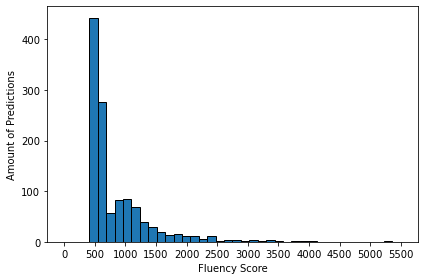

In [178]:
fig, ax = plt.subplots()

# the histogram of the data
n, bins, patches = ax.hist(predictions, 
                           bins=40, 
                           edgecolor='black', 
                           linewidth=1, 
                           range=[0, 5500])

# add axis
ax.set_xlabel('Fluency Score')
ax.set_ylabel('Amount of Predictions')
plt.xticks(np.arange(0,6000,500))
plt.xticks(rotation=0)

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()

plt.savefig('hist.jpg')
plt.show()